Ultralytics 8.3.95 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 72 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

Dataset 'coco.yaml' images not found ⚠️, missing path '/content/datasets/coco/val2017.txt'


100%|██████████| 169M/169M [00:00<00:00, 179MB/s]
Unzipping /content/datasets/coco2017labels-segments.zip to /content/datasets/coco...: 100%|██████████| 122232/122232 [00:28<00:00, 4258.01file/s]

Dataset download success ✅ (529.3s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]
val: Scanning /content/datasets/coco/labels/val2017... 4952 images, 48 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:19<00:00, 262.17it/s]


val: New cache created: /content/datasets/coco/labels/val2017.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 313/313 [21:59<00:00,  4.21s/it]


                   all       5000      36335      0.634      0.474      0.521      0.372
                person       2693      10777      0.755      0.671      0.745      0.515
               bicycle        149        314       0.69      0.392      0.457      0.264
                   car        535       1918      0.649      0.514      0.562      0.365
            motorcycle        159        367      0.715       0.58      0.659      0.414
              airplane         97        143      0.814      0.764      0.834      0.653
                   bus        189        283      0.747      0.643      0.739       0.62
                 train        157        190      0.798       0.77      0.833      0.647
                 truck        250        414      0.547      0.397      0.435      0.295
                  boat        121        424      0.583        0.3      0.376       0.21
         traffic light        191        634      0.647      0.345      0.409      0.212
          fire hydran

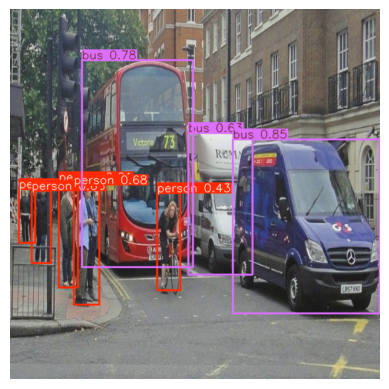

In [11]:

!pip install ultralytics opencv-python matplotlib albumentations


from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import albumentations as A

model = YOLO("yolov8n.pt")


def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transform = A.Compose([
        A.Resize(640, 640),
        A.RandomBrightnessContrast(p=0.2),
        A.HorizontalFlip(p=0.5)
    ])
    augmented = transform(image=image)['image']
    return augmented




metrics = model.val()
print("Model Performance (mAP Score):", metrics)


image_path = "/content/1_v0Bm-HQxWtpbQ0Yq463uqw.jpg"
image = preprocess_image(image_path)

results = model(image)

result = results[0]


img_with_boxes = result.plot()
plt.imshow(img_with_boxes)
plt.axis("off")
plt.show()
